# Module 3 Final Project - Hypothesis Testing

* Student name: Tara Mullin
* Student pace: Part time
* Scheduled project review date/time: 8/29/19 3:15pm EST
* Instructor name: Victor Geislinger 
* Blog post URL: TBD

## Importing Libraries and Data from SQL

In [2]:
import pandas as pd
import numpy as np
from scipy import stats 
import math

# For visualizations
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Use sqlite3 to get the data
import sqlite3
conn = sqlite3.connect('Northwind_small.sqlite')
cur = conn.cursor()

In [4]:
#create pandas df
cur.execute('''SELECT * 
               FROM OrderDetail;''')
Order = pd.DataFrame(cur.fetchall())
Order.columns = [x[0] for x in cur.description]

In [5]:
Order.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


In [6]:
Order.describe()

,OrderId,ProductId,UnitPrice,Quantity,Discount
count,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000
mean,10659.375870,40.793039,26.218520,23.812993,0.056167
std,241.378032,22.159019,29.827418,19.022047,0.083450
min,10248.000000,1.000000,2.000000,1.000000,0.000000
25%,10451.000000,22.000000,12.000000,10.000000,0.000000
50%,10657.000000,41.000000,18.400000,20.000000,0.000000
75%,10862.500000,60.000000,32.000000,30.000000,0.100000
max,11077.000000,77.000000,263.500000,130.000000,0.250000


## Q 1) Does Applying a Discount Impact Quanity Sold?

### Preparing for Hypothesis Test

In [8]:
#separate df into discount and no discount to compare quantity sold in these two groups
discount = Order[Order.Discount > 0]['Quantity'] #series, all rows w discount, but only quantity column
no_discount = Order[Order.Discount == 0]['Quantity']

In [9]:
#get mean of no discount group for null hypothesis
no_discount.mean()

21.715261958997722

In [105]:
# No discount mean
mu_nodiscount = no_discount.mean()

# Disount mean
mu_discount = discount.mean()

# Sample size (n)
n = len(discount)

# Degrees of Freedom
df = n-1

# Sample Standard Deviation (sigma) using Numpy
std_discount = np.std(discount)

# Difference in means
diff = mu_discount - mu_nodiscount


# Print the findings
print ('The discount group contains', n, 'observations, having a mean of', np.round(mu_discount,3), 
       "and a standard deviation = ", np.round(std_discount,3), 
       ", with", df, "degrees of freedom. The no discount group contains", len(no_discount), 
       "observations, and has a mean of", np.round(mu_nodiscount,3), "and a standard deviation = ", 
       np.round(np.std(no_discount,ddof=1),3), 
       ". The difference between sample and population means is:", np.round(diff,3))

The discount group contains 838 observations, having a mean of 27.11 and a standard deviation =  20.759 , with 837 degrees of freedom. The no discount group contains 1317 observations, and has a mean of 21.715 and a standard deviation =  17.507 . The difference between sample and population means is: 5.395


/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


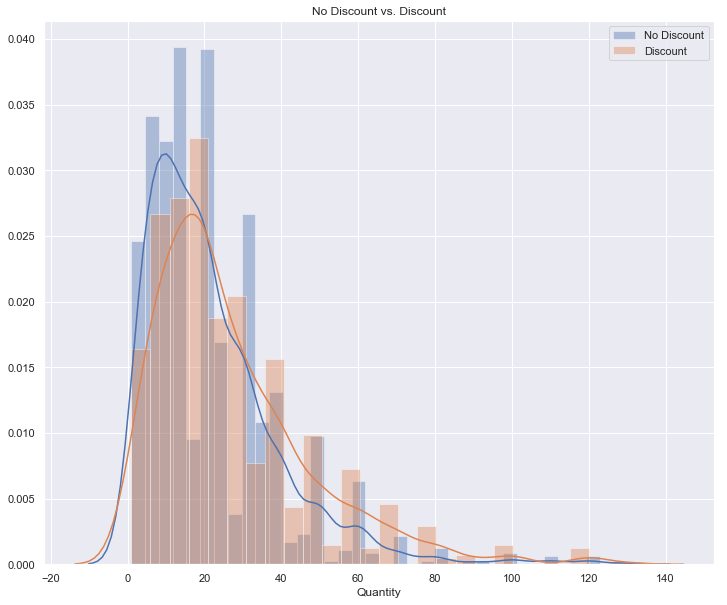

In [12]:
#How does the distribution of no discount look overlaid with the distribution of discount?

plt.title("No Discount vs. Discount")
sns.distplot(no_discount, label='No Discount') 
sns.distplot(discount, label='Discount')
plt.legend()
plt.show()

The mean of the discount group is higher than the no discount group, and the distribution of the discount group does appear to be to the right (high quantity) of the no discount group. But is this difference significant?

### **One Tail Hypothesis Test - Does Discount Matter?**

#### Step 1: Write the null and alternative hypothesis statements

$H_{0}$  : There is no relationship between quantity and discount, i.e. mean number sold with a discount <= mean sold without a discount. 

- mu_discount <= mu_nodiscount  --->  mu_discount <= 21.72

$H_{1}$ : There is a relationship between quanity and discount, i.e. mean number sold with a discount > mean sold without a discount. 

- mu_discount > mu_nodiscount ---> mu_discount > 21.72

#### Step 2: Choose a significance level (`α`)

`α` is the probability of rejecting the nully hypothesis when it is true. I will use the standard significance level of `α` = 0.05, meaning that there is a 5% chance risk of concluding that a difference exists when there is no actual difference.

#### Step 3: Calculate the t-statistic

Formula for one-sample t-test given as:

 $$t = \frac{\bar{x}-\mu}{\frac{s}{\sqrt{n}}}$$
 
> Using the formula given above, calculate the t-value in Python:

**`scipy.stats.t.ppf(1-alpha, df)`**

**`scipy.stats.ttest_1samp(a, popmean, axis=0, nan_policy='propagate')`**

In [106]:
# Calculate critical t value
t_crit = np.round(stats.t.ppf(1 - 0.05, df=df),3)
print("t_critical value = ", t_crit)

t_critical value =  1.647


In [108]:
# Calculate t stat and p value
results = stats.ttest_1samp(a= discount, popmean= mu_nodiscount)         
print ("The t-value for the discount group is", round(results[0], 2), "and the p-value is", (results[1]))

The t-value for the discount group is 7.52 and the p-value is 1.4308992265460746e-13


In [109]:
if (results[0]>t_crit) and (results[1]<0.05):
    print ("Null hypothesis rejected. Results are statistically significant with t-value =", 
           round(results[0], 2), "and p-value =", np.round((results[1]), 4),". I conclude with 95% confidence that there is a relationship between discount and quantity sold - larger quantities are sold when a discount is offered.")
else:
    print ("Null hypothesis is Accepted")

Null hypothesis rejected. Results are statistically significant with t-value = 7.52 and p-value = 0.0 . I conclude with 95% confidence that there is a relationship between discount and quantity sold - larger quantities are sold when a discount is offered.


### Welch's t-test

In [103]:
discount.describe()

count    838.000000
mean      27.109785
std       20.771439
min        1.000000
25%       12.000000
50%       20.000000
75%       36.000000
max      130.000000
Name: Quantity, dtype: float64

In [104]:
no_discount.describe()

count    1317.000000
mean       21.715262
std        17.507493
min         1.000000
25%        10.000000
50%        18.000000
75%        30.000000
max       130.000000
Name: Quantity, dtype: float64

In [110]:
np.var(discount)

430.93782787748984

In [111]:
np.var(no_discount)

306.2795924332757

The discount and no discount groups are not the same size, so it is more conservation to use the welch's t test.

In [16]:
def welch_t(a, b):
    
    """ Calculate Welch's t statistic for two samples. """

    numerator = a.mean() - b.mean()
    
    # “ddof = Delta Degrees of Freedom”: the divisor used in the calculation is N - ddof, 
    #  where N represents the number of elements. By default ddof is zero.
    
    denominator = np.sqrt(a.var(ddof=1)/a.size + b.var(ddof=1)/b.size)
    
    return np.abs(numerator/denominator)

welch_t(no_discount, discount)

6.239069142123973

In [17]:
def welch_df(a, b):
    
    """ Calculate the effective degrees of freedom for two samples. """
    
    s1 = a.var(ddof=1) 
    s2 = b.var(ddof=1)
    n1 = a.size
    n2 = b.size
    
    numerator = (s1/n1 + s2/n2)**2
    denominator = (s1/ n1)**2/(n1 - 1) + (s2/ n2)**2/(n2 - 1)
    
    return numerator/denominator

welch_df(no_discount, discount)
# 17.673079085111

1561.7678231942148

In [113]:
t = welch_t(no_discount, discount)
df = welch_df(no_discount, discount)
print("t-stat =",t, "degrees of freedome =",df)

t-stat = 6.239069142123973 degrees of freedome = 1561.7678231942148


In [19]:
p = 1 - stats.t.cdf(t, df)
print(p)

2.8282065578366655e-10


In [20]:
def p_value(a, b, two_sided=False):

    t = welch_t(a, b)
    df = welch_df(a, b)
    
    p = 1-stats.t.cdf(np.abs(t), df)
    
    if two_sided:
        return 2*p
    else:
        return p

In [114]:
welch_result = p_value(no_discount, discount)
print("p-value =",welch_result)

p-value = 2.8282065578366655e-10


In [115]:
if  (welch_result < 0.05):
    print ("Welch's t-test: Null hypothesis rejected. Results are statistically significant with t-value =", 
           round(t, 3), "and p-value =", welch_result,". I conclude with 95% confidence that there is a relationship between discount and quantity sold - larger quantities are sold when a discount is offered.")
else:
    print ("Null hypothesis is Accepted")

Welch's t-test: Null hypothesis rejected. Results are statistically significant with t-value = 6.239 and p-value = 2.8282065578366655e-10 . I conclude with 95% confidence that there is a relationship between discount and quantity sold - larger quantities are sold when a discount is offered.


### Cohen's $d$

Cohen’s D is a common ways to measure effect size.  Cohen's d is typically used to represent the magnitude of differences between two (or more) groups on a given variable, with larger values representing a greater differentiation between the two groups.

The basic formula to calculate Cohen’s $d$ is:

> ** $d$  = effect size (difference of means) / pooled standard deviation **

The denominator is the **standardiser**, and it is important to select the most appropriate one for a given dataset. The pooled standard deviation is the average spread of all data points around their group mean (not the overall mean). 

In [23]:
def Cohen_d(group1, group2):

    # Compute Cohen's d.

    # group1: Series or NumPy array
    # group2: Series or NumPy array

    # returns a floating point number 

    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d

In [118]:
print("Cohen's d comparing discount and no discount group =", Cohen_d(discount, no_discount))

Cohen's d comparing discount and no discount group = 0.2862724481729282


#### Interpreting $d$
Interpreting the result of Cohen’s D means, use these general “rule of thumb” guidelines (which Cohen said should be used cautiously):

>**Small effect = 0.2**

>**Medium Effect = 0.5**

>**Large Effect = 0.8**

### Conclusion

Using an alpha of 0.05, I conclude with 95% confidence that discount does matter in terms of quantity sold. Higher quantities are sold when a discount is applied. While the difference between quantity sold with a discount vs. without a discount is statistically significant, the Cohen's $d$ comparing quantity sold at a discount vs. no discount = 0.286, suggests that the effect of a discount is small.

## Q 2) Does Level of Discount Matter in Terms of Quantity Sold?

### Preparing for Hypothesis Test

In [7]:
#what levels of discount are possible?
Order.Discount.unique()

array([0.  , 0.15, 0.05, 0.2 , 0.25, 0.1 , 0.02, 0.03, 0.04, 0.06, 0.01])

In [100]:
#how many of each level of discount do we have?
Order.Discount.value_counts()

0.00    1317
0.05     185
0.10     173
0.20     161
0.15     157
0.25     154
0.03       3
0.02       2
0.01       1
0.04       1
0.06       1
Name: Discount, dtype: int64

Possible discounts are: 0% (no discount), 1%, 2%, 3%, 4%, 5%, 6%, 10%, 15%, 20%, 25% 

There are less than three observations for discounts 1-4% and 6%, so our important discount levels are:

- No discount
- 5%
- 10%
- 15%
- 20%
- 25%

In [123]:
#create a df that only has orders where a discount of 5% or more was applied to use for an ANOVA test to compare levels of discount
df_discount5 = Order[Order.Discount > .04]
df_discount5.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
6,10250/51,10250,51,42.4,35,0.15
7,10250/65,10250,65,16.8,15,0.15
8,10251/22,10251,22,16.8,6,0.05
9,10251/57,10251,57,15.6,15,0.05
11,10252/20,10252,20,64.8,40,0.05


### Analysis of Variance (ANOVA) - Is There a Difference Between the Levels of Discount?

Is there a difference between in quantity sold at different levels of discount?

$H_{0}$  : There is no relationship between quantity and level of discount, i.e. mean number sold is the same at each level

- mu_discount5 = mu_discount6 = mu_discount10 = mu_discount15 = mu_discount20 = mu_discount25

$H_{1}$ : There is a relationship between quanity and level of discount, i.e. mean number sold differ by level of discount
    
- mu_discount5 != mu_discount6 != mu_discount10 != mu_discount15 != mu_discount20 != mu_discount25

In [30]:
#is there a difference between all different discounts?
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'Quantity ~ C(Discount)'
lm = ols(formula, df_discount5).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                    sum_sq     df         F   PR(>F)
C(Discount)    1801.580295    5.0  0.837901  0.52289
Residual     354768.342690  825.0       NaN      NaN


### ANOVA Conclusion

- PR(>F) > alpha
- 0.523 > 0.05

With 95% confidence I conclude that there is no significant difference between the quantity of products sold at different discount levels. While applying a discount does significantly increase the number of products sold, the level of discount applied doesn't matter.

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


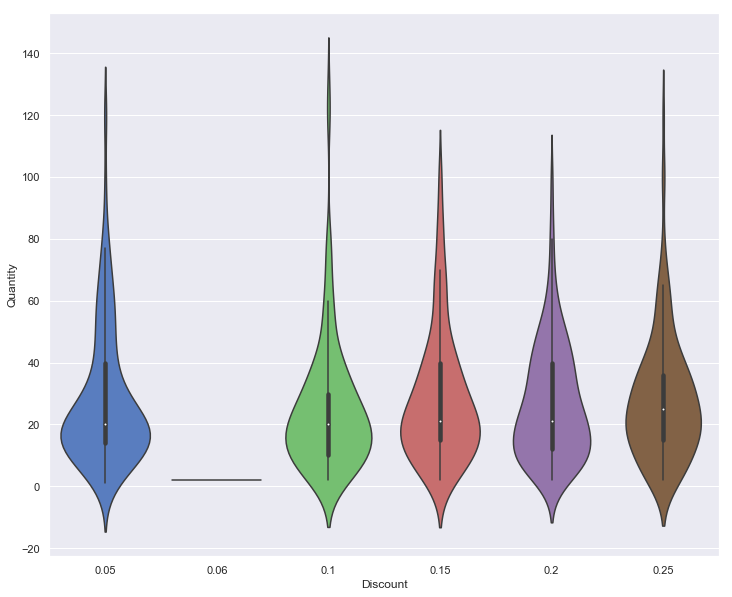

In [53]:
ax = sns.violinplot(x="Discount", y="Quantity",
                    data=df_discount5, palette="muted", split=True)

## Q 3) Which Price Level is Most Impacted by Discounts?

Now that I know that discount increases quanity sold, but that the level of discount doesn't matter, I want to know how discount impacts products priced at different price points. I would hypothesize that higher priced products would be more impacted by applying a discount.

### Preparing Data for Hypothesis Test

In [54]:
#how is UnitPrice distributed?
Order.UnitPrice.describe()

count    2155.000000
mean       26.218520
std        29.827418
min         2.000000
25%        12.000000
50%        18.400000
75%        32.000000
max       263.500000
Name: UnitPrice, dtype: float64

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


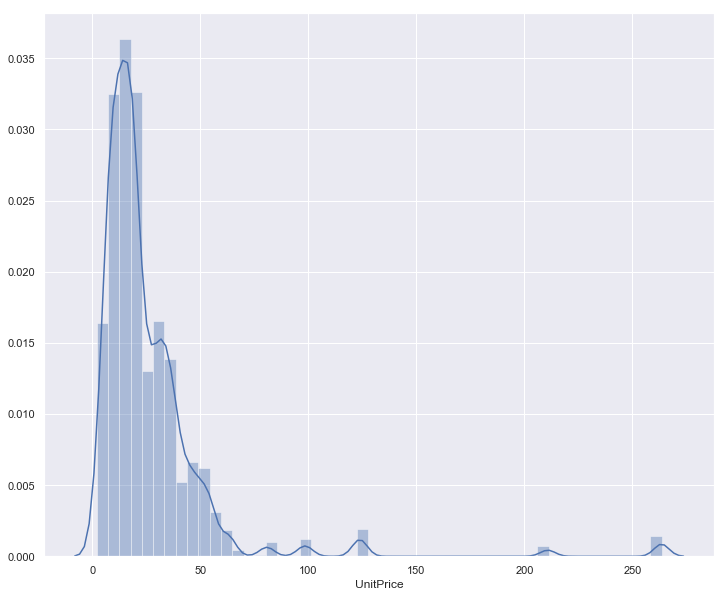

In [32]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(Order.UnitPrice)

/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


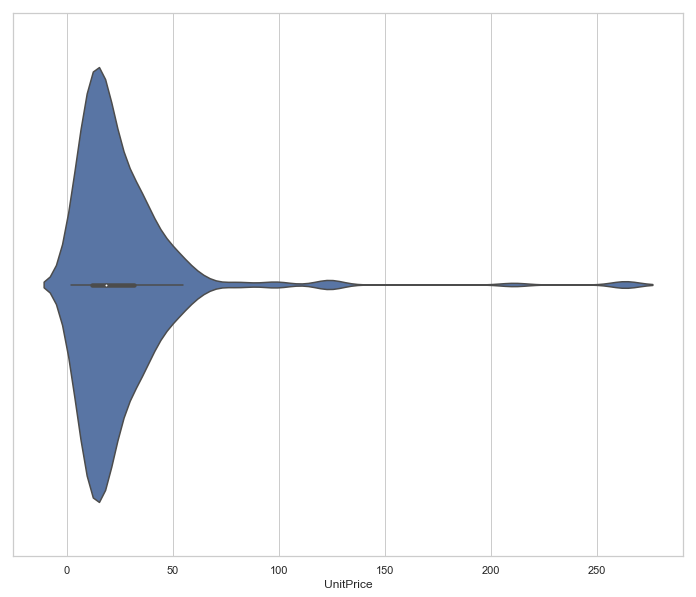

In [55]:
sns.set(style="whitegrid")
sns.violinplot(x=Order["UnitPrice"])

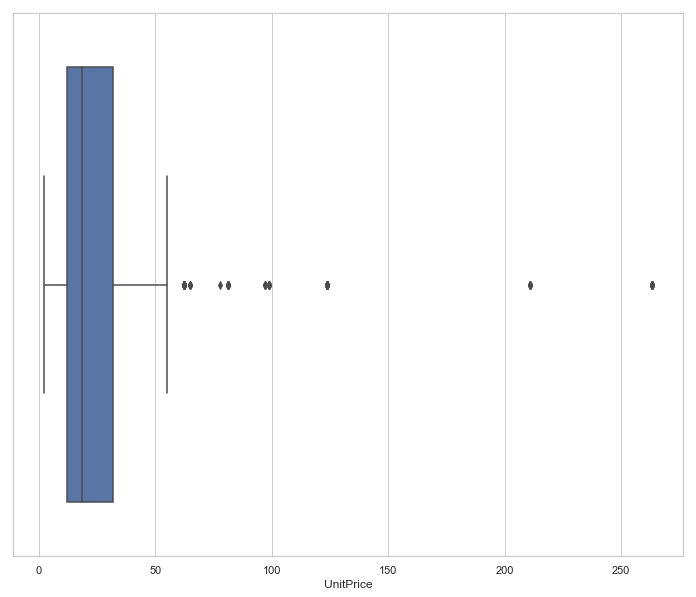

In [56]:
sns.set(style="whitegrid")
sns.boxplot(x=Order["UnitPrice"])

I will divide UnitPrice into 4 different groups based on UnitPrice's quartiles:

   - Low Price Group: UnitPrice <= $12.00
   
   - Mid-Low Price Group: $12.00 < UnitPrice <= $18.40
    
   - Mid-High Price Group: $18.40 < UnitPrice <= $32.00
   
   - High Price Group: UnitPrice > $32.00


In [124]:
#create a dataframe for bottom quartile of UnitPrice
cur.execute('''SELECT * 
               FROM OrderDetail
               WHERE UnitPrice <= 12;''')
Order_lowprice = pd.DataFrame(cur.fetchall())
Order_lowprice.columns = [x[0] for x in cur.description]
Order_lowprice.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/42,10248,42,9.8,10,0.00
1,10250/41,10250,41,7.7,10,0.00
2,10252/33,10252,33,2.0,25,0.05
3,10253/31,10253,31,10.0,20,0.00
4,10254/24,10254,24,3.6,15,0.15


In [58]:
Order_lowprice.describe()

,OrderId,ProductId,UnitPrice,Quantity,Discount
count,549.000000,549.000000,549.000000,549.000000,549.000000
mean,10626.185792,40.051002,7.910018,23.040073,0.053862
std,247.001312,20.384738,2.523739,18.710097,0.081391
min,10248.000000,3.000000,2.000000,1.000000,0.000000
25%,10410.000000,23.000000,6.000000,10.000000,0.000000
50%,10591.000000,41.000000,8.000000,20.000000,0.000000
75%,10847.000000,54.000000,10.000000,30.000000,0.100000
max,11077.000000,77.000000,12.000000,120.000000,0.250000


In [125]:
#create a dataframe for second quartile of UnitPrice
cur.execute('''SELECT * 
               FROM OrderDetail
               WHERE UnitPrice > 12 AND UnitPrice <= 18.4;''')
Order_midlowprice = pd.DataFrame(cur.fetchall())
Order_midlowprice.columns = [x[0] for x in cur.description]
Order_midlowprice.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.00
1,10250/65,10250,65,16.8,15,0.15
2,10251/22,10251,22,16.8,6,0.05
3,10251/57,10251,57,15.6,15,0.05
4,10251/65,10251,65,16.8,20,0.00


In [60]:
Order_midlowprice.describe()

,OrderId,ProductId,UnitPrice,Quantity,Discount
count,542.000000,542.000000,542.000000,542.000000,542.000000
mean,10645.450185,42.516605,15.518081,24.476015,0.059668
std,241.471506,24.138286,2.001916,18.737864,0.084154
min,10248.000000,1.000000,12.400000,1.000000,0.000000
25%,10439.250000,26.500000,14.000000,10.000000,0.000000
50%,10646.000000,40.000000,15.200000,20.000000,0.000000
75%,10845.000000,68.000000,17.562500,34.500000,0.100000
max,11077.000000,77.000000,18.400000,130.000000,0.250000


In [61]:
#create a dataframe for third quartile of UnitPrice
cur.execute('''SELECT * 
               FROM OrderDetail
               WHERE UnitPrice > 18.4 AND UnitPrice <= 32;''')
Order_midhighprice = pd.DataFrame(cur.fetchall())
Order_midhighprice.columns = [x[0] for x in cur.description]
Order_midhighprice.describe()

,OrderId,ProductId,UnitPrice,Quantity,Discount
count,533.000000,533.000000,533.000000,533.000000,533.000000
mean,10666.793621,34.893058,24.515629,23.534709,0.057129
std,241.834154,23.566691,4.399765,18.851946,0.085254
min,10249.000000,2.000000,18.600000,1.000000,0.000000
25%,10455.000000,11.000000,21.000000,10.000000,0.000000
50%,10656.000000,32.000000,24.000000,20.000000,0.000000
75%,10872.000000,57.000000,28.500000,30.000000,0.100000
max,11077.000000,72.000000,32.000000,120.000000,0.250000


In [127]:
#create a dataframe for third top of UnitPrice
cur.execute('''SELECT * 
               FROM OrderDetail
               WHERE UnitPrice > 32;''')
Order_highprice = pd.DataFrame(cur.fetchall())
Order_highprice.columns = [x[0] for x in cur.description]
Order_highprice.describe()

,OrderId,ProductId,UnitPrice,Quantity,Discount
count,531.000000,531.000000,531.000000,531.000000,531.000000
mean,10700.459510,45.723164,57.779058,24.214689,0.054011
std,228.911567,18.727958,46.048807,19.803255,0.083095
min,10248.000000,8.000000,32.800000,1.000000,0.000000
25%,10529.500000,28.000000,36.400000,10.000000,0.000000
50%,10711.000000,53.000000,43.900000,20.000000,0.000000
75%,10891.000000,60.000000,54.000000,30.000000,0.100000
max,11077.000000,72.000000,263.500000,130.000000,0.250000


### **3.1) One Tail Hypothese Test - Does Discount Matter for Low Price ( <= $12)?**

In [63]:
discount_lowprice = Order_lowprice[Order_lowprice.Discount > 0]['Quantity'] #series, all rows w discount, but only quantity column
no_discount_lowprice = Order_lowprice[Order_lowprice.Discount == 0]['Quantity']

In [64]:
discount_lowprice.head()

2     25
4     15
9     16
10    21
13    36
Name: Quantity, dtype: int64

In [128]:
# No discount mean (μ1)
mu_nodiscount_lowprice = no_discount_lowprice.mean()

# Disount mean (x̄) using NumPy mean()
mu_discount_lowprice = discount_lowprice.mean()

# Sample Stadrad Deviation (sigma) using Numpy
std_discount_lowprice = np.std(discount_lowprice)

# Sample size (n)
n_discount_lowprice = len(discount_lowprice)

# Degrees of Freedom
df_discount_lowprice = n-1

# Difference in means
diff_lowprice = mu_discount_lowprice - mu_nodiscount_lowprice


# Print the findings
print ('The discount group within the low price group contains', n_discount_lowprice, 'observations, having a mean of', np.round(mu_discount_lowprice,3), 
       "and a standard deviation = ", np.round(std_discount_lowprice,3), 
       ", with", df_discount_lowprice, "degrees of freedom. The no discount group within the low price group contains", len(no_discount_lowprice), 
       "observations, and has a mean of", np.round(mu_nodiscount_lowprice,3), "and a standard deviation = ", 
       np.round(np.std(no_discount_lowprice,ddof=1),3), 
       ". The difference between sample and population means is:", np.round(diff_lowprice,3))

The discount group within the low price group contains 209 observations, having a mean of 24.89 and a standard deviation =  19.252 , with 837 degrees of freedom. The no discount group within the low price group contains 340 observations, and has a mean of 21.903 and a standard deviation =  18.275 . The difference between sample and population means is: 2.987


/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


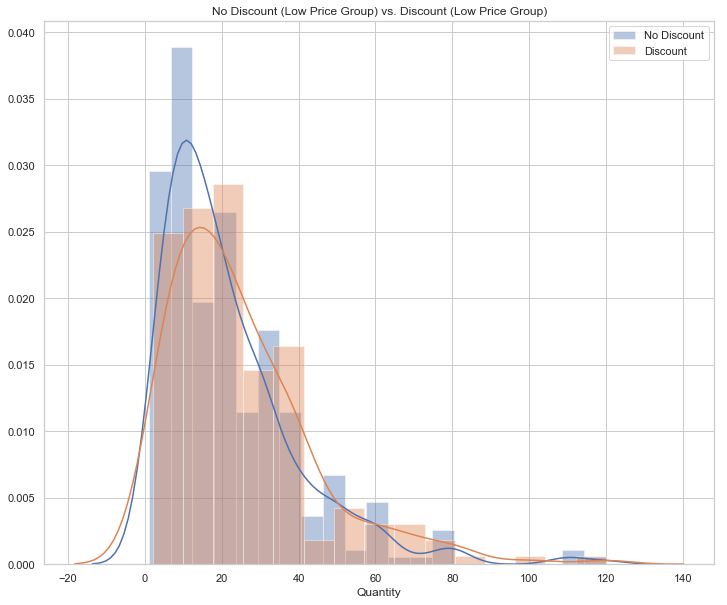

In [66]:
plt.title("No Discount (Low Price Group) vs. Discount (Low Price Group)")
sns.distplot(no_discount_lowprice, label='No Discount') 
sns.distplot(discount_lowprice, label='Discount')
plt.legend()
plt.show()


#### Step 1: Write the null and alternative hypothesis statements

$H_{0}$ : There is no relationship between quantity and discount for low price products, i.e. mean number of low price products sold with a discount <= mean number of low price products sold without a discount. 

     - mu_discount_lowprice <= 21.930

$H_{1}$ : There is a relationship between quanity and discount for low price products, i.e. mean number of low price products sold with a discount <= mean number of low price products sold without a discount. 
 

    - mu_discount_lowprice > 21.930

#### Step 2: Choose a significance level (`α`)

`α` is the probability of rejecting the nully hypothesis when it is true. I will use the standard significance level of `α` = 0.05, meaning that there is a 5% chance risk of concluding that a difference exists when there is no actual difference.

#### Step 3: Calculate the t stat and p value using Welch's t test because size and variance is different between the groups

In [67]:
t = welch_t(no_discount_lowprice, discount_lowprice)
df = welch_df(no_discount_lowprice, discount_lowprice)
print(t,df)

1.7965866751063824 421.85974122840736


In [68]:
welch_result_lowprice = p_value(no_discount_lowprice, discount_lowprice)
print(welch_result_lowprice)

0.036558259811514615


In [69]:
if  (welch_result_lowprice < 0.05):
    print ("Welch's t-test: Null hypothesis rejected. Results are statistically significant with t-value =", 
           round(t, 3), "and p-value =", welch_result_lowprice,". I conclude with 95% confidence that there is a relationship between discount and quantity sold for the low price group. Larger quantities are sold when a discount is offered.")
else:
    print ("Null hypothesis is Accepted")

Welch's t-test: Null hypothesis rejected. Results are statistically significant with t-value = 1.797 and p-value = 0.036558259811514615 . I conclude with 95% confidence that there is a relationship between discount and quantity sold for the low price group. Larger quantities are sold when a discount is offered.


In [70]:
Cohen_d(discount_lowprice, no_discount_lowprice)

0.1599796998480053

#### Conclusion - Does discount matter for low priced products?
We see an effect size less than 0.2, indicating that while discount is statistically significant for low price products, the effect of discount at this price point is very small

### 3.2) **One Tail Hypothese Test - Does Discount Matter for Mid-Low Price ($12 < UnitPrice < $18.4 )?**

In [71]:
discount_midlowprice = Order_midlowprice[Order_midlowprice.Discount > 0]['Quantity'] #series, all rows w discount, but only quantity column
no_discount_midlowprice = Order_midlowprice[Order_midlowprice.Discount == 0]['Quantity']

In [129]:
# No discount mean (μ1)
mu_nodiscount_midlowprice = no_discount_midlowprice.mean()

# Disount mean (x̄) using NumPy mean()
mu_discount_midlowprice = discount_midlowprice.mean()

# Sample size (n)
n_discount_midlowprice = len(discount_midlowprice)

# Degrees of Freedom
df_discount_midlowprice = n_discount_midlowprice-1

# Sample Stadrad Deviation (sigma) using Numpy
std_discount_midlowprice = np.std(discount_midlowprice)

# Difference in means
diff_midlowprice = mu_discount_midlowprice - mu_nodiscount_midlowprice


# Print the findings
print ('The discount group within the mid-low price group contains', n_discount_midlowprice, 'observations, having a mean of', np.round(mu_discount_midlowprice,3), 
       "and a standard deviation = ", np.round(std_discount_midlowprice,3), 
       ", with", df_discount_midlowprice, "degrees of freedom. The no discount group within the mid-low price group contains", len(no_discount_midlowprice), 
       "observations, and has a mean of", np.round(mu_nodiscount_midlowprice,3), 
       ". The difference between sample and population means is:", np.round(diff_midlowprice,3))

The discount group within the mid-low price group contains 222 observations, having a mean of 28.486 and a standard deviation =  21.461 , with 221 degrees of freedom. The no discount group within the mid-low price group contains 320 observations, and has a mean of 21.694 . The difference between sample and population means is: 6.793


/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


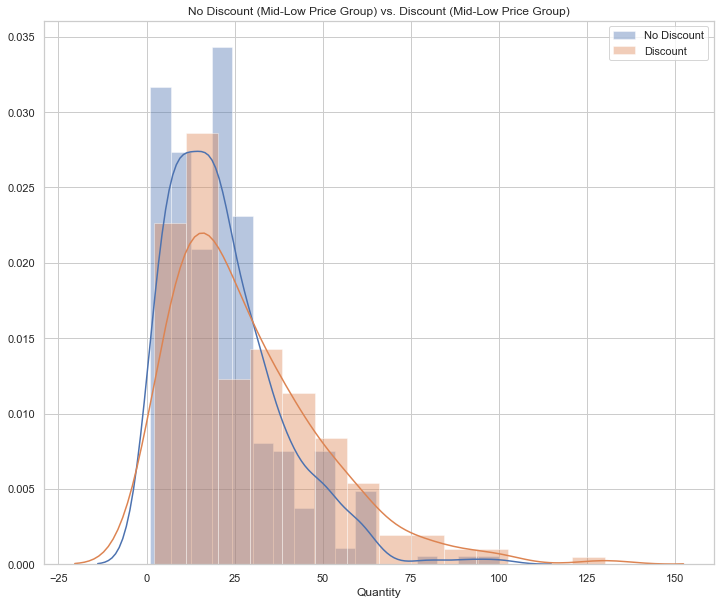

In [73]:
plt.title("No Discount (Mid-Low Price Group) vs. Discount (Mid-Low Price Group)")
sns.distplot(no_discount_midlowprice, label='No Discount') 
sns.distplot(discount_midlowprice, label='Discount')
plt.legend()
plt.show()

#### Step 1: Write the null and alternative hypothesis statements

$H_{0}$ : There is no relationship between quantity sold and discount for mid-low price products, i.e. mean number of low price products sold with a discount <= mean number of low price products sold without a discount. 

    - mu_discount_midlowprice <= 21.694

$H_{1}$ : There is a relationship between quanity sold and discount for mid-low price products, i.e. mean number of low price products sold with a discount <= mean number of low price products sold without a discount. 
 

    - mu_discount_midlowprice > 21.694


#### Step 2: Choose a significance level (`α`)

`α` is the probability of rejecting the nully hypothesis when it is true. I will use the standard significance level of `α` = 0.05, meaning that there is a 5% chance risk of concluding that a difference exists when there is no actual difference.

#### Step 3: Calculate the t stat and p value using Welch's t test because the number of observations in each group is not equal.

In [132]:
t = welch_t(no_discount_midlowprice, discount_midlowprice)
df = welch_df(no_discount_midlowprice, discount_midlowprice)
print("Welch's t stat =",t,"df =",df)

welch_result_midlowprice = p_value(no_discount_midlowprice, discount_midlowprice)
print("Welch's t test p value =", welch_result_midlowprice)

if  (welch_result_midlowprice < 0.05):
    print ("Welch's t-test: Null hypothesis rejected. Results are statistically significant with t-value =", 
           round(t, 3), "and p-value =", welch_result_midlowprice,". I conclude with 95% confidence that there is a relationship between discount and quantity sold for the low price group. Larger quantities are sold when a discount is offered.")
else:
    print ("Null hypothesis is Accepted")

Welch's t stat = 3.999888459323016 df = 384.0012814521908
Welch's t test p value = 3.801646436729644e-05
Welch's t-test: Null hypothesis rejected. Results are statistically significant with t-value = 4.0 and p-value = 3.801646436729644e-05 . I conclude with 95% confidence that there is a relationship between discount and quantity sold for the low price group. Larger quantities are sold when a discount is offered.


In [133]:
Cohen_d(discount_midlowprice, no_discount_midlowprice)

0.3680484082392516

#### Conclusion - Does discount matter for mid-low priced products?
We see an effect size less than 0.368, indicating that discounts applied to products priced greater than 12, but less than 18.4 have a larger effect that discounts applied to products priced less than $12.

### **3.3) One Tail Hypothese Test - Does Discount Matter for Mid-High Price ($18.4 < UnitPrice < $32 )?**

In [76]:
discount_midhighprice = Order_midhighprice[Order_midhighprice.Discount > 0]['Quantity'] #series, all rows w discount, but only quantity column
no_discount_midhighprice = Order_midhighprice[Order_midhighprice.Discount == 0]['Quantity']

In [134]:
# No discount mean (μ1)
mu_nodiscount_midhighprice = no_discount_midhighprice.mean()

# Disount mean (x̄) using NumPy mean()
mu_discount_midhighprice = discount_midhighprice.mean()

# Sample size (n)
n_discount_midhighprice = len(discount_midhighprice)

# Degrees of Freedom
df_discount_midhighprice = n_discount_midhighprice-1

# Sample Stadrad Deviation (sigma) using Numpy
std_discount_midhighprice = np.std(discount_midhighprice)

# Difference in means
diff_midhighprice = mu_discount_midhighprice - mu_nodiscount_midhighprice


# Print the findings
print ('The discount group within the mid-high price group contains', n_discount_midhighprice, 'observations, having a mean of', np.round(mu_discount_midhighprice,3), 
       "and a standard deviation = ", np.round(std_discount_midhighprice,3), 
       ", with", df_discount_midhighprice, "degrees of freedom. The no discount group within the mid-high price group contains", len(no_discount_midhighprice), 
       "observations, and has a mean of", np.round(mu_nodiscount_midhighprice,3), 
       ". The difference between sample and population means is:", np.round(diff_midhighprice,3))

The discount group within the mid-high price group contains 207 observations, having a mean of 28.126 and a standard deviation =  22.345 , with 206 degrees of freedom. The no discount group within the mid-high price group contains 326 observations, and has a mean of 20.62 . The difference between sample and population means is: 7.506


/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


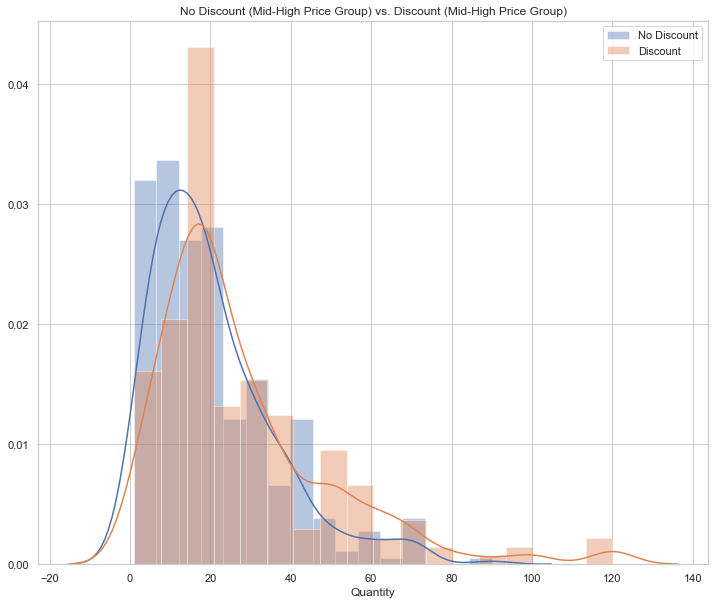

In [78]:
plt.title("No Discount (Mid-High Price Group) vs. Discount (Mid-High Price Group)")
sns.distplot(no_discount_midhighprice, label='No Discount') 
sns.distplot(discount_midhighprice, label='Discount')
plt.legend()
plt.show()

#### Step 1: Write the null and alternative hypothesis statements

$H_{0}$ : There is no relationship between quantity sold and discount for mid-high priced products, i.e. mean number of mid-high price products sold with a discount <= mean number of mid-high price products sold without a discount. 

    - mu_discount_midhighprice <= 20.62

$H_{1}$ : There is a relationship between quanity and discount for mid-high price products, i.e. mean number of mid-high price products sold with a discount <= mean number of mid-high price products sold without a discount. 
 

    - mu_discount_midhighprice > 20.62


#### Step 2: Choose a significance level (`α`)

`α` is the probability of rejecting the nully hypothesis when it is true. I will use the standard significance level of `α` = 0.05, meaning that there is a 5% chance risk of concluding that a difference exists when there is no actual difference.

#### Step 3: Calculate the t stat and p value using Welch's t test because the number of observations in each group is not equal.

In [135]:


t = welch_t(no_discount_midhighprice, discount_midhighprice)
df = welch_df(no_discount_midhighprice, discount_midhighprice)
print("Welch's t stat =",t,"df =",df)

welch_result_midhighprice = p_value(no_discount_midhighprice, discount_midhighprice)
print("Welch's t test p value =",welch_result_midhighprice)

if  (welch_result_midhighprice < 0.05):
    print ("Welch's t-test: Null hypothesis rejected. Results are statistically significant with t-value =", 
           round(t, 3), "and p-value =", welch_result_midhighprice,". I conclude with 95% confidence that there is a relationship between discount and quantity sold for the low price group. Larger quantities are sold when a discount is offered.")
else:
    print ("Null hypothesis is Accepted")

Welch's t stat = 4.218748506074823 df = 331.66859192460504
Welch's t test p value = 1.5869468364959616e-05
Welch's t-test: Null hypothesis rejected. Results are statistically significant with t-value = 4.219 and p-value = 1.5869468364959616e-05 . I conclude with 95% confidence that there is a relationship between discount and quantity sold for the low price group. Larger quantities are sold when a discount is offered.


In [80]:
Cohen_d(discount_midhighprice, no_discount_midhighprice)

0.4054373400386941

#### 3.3) Conclusion - Does discount matter for mid-low priced products?
We see an effect size less than 0.405, indicating that discounts applied to products priced greater than 18.4, but less than 32 have a larger effect that discounts applied to products priced less than 12 and between 12 and 18.4. A cohen's d less than 0.5 is still considered "small effect", but we are getting close to medium effect.

###  3.4) **One Tail Hypothese Test - Does Discount Matter for High Priced Products ( UnitPrice > $32 )?**

In [81]:
discount_highprice = Order_highprice[Order_highprice.Discount > 0]['Quantity'] #series, all rows w discount, but only quantity column
no_discount_highprice = Order_highprice[Order_highprice.Discount == 0]['Quantity']

In [82]:
# No discount mean (μ1)
mu_nodiscount_highprice = no_discount_highprice.mean()

# Disount mean (x̄) using NumPy mean()
mu_discount_highprice = discount_highprice.mean()

# Sample size (n)
n_discount_highprice = len(discount_highprice)

# Degrees of Freedom
df_discount_highprice = n_discount_highprice-1

# Sample Stadrad Deviation (sigma) using Numpy
std_discount_highprice = np.std(discount_highprice,ddof=df_discount_highprice)

# Difference in means
diff_highprice = mu_discount_highprice - mu_nodiscount_highprice


# Print the findings
print ('The discount group within the high price group contains', n_discount_highprice, 'observations, having a mean of', np.round(mu_discount_highprice,3), 
       "and a standard deviation = ", np.round(std_discount_highprice,3), 
       ", with", df_discount_highprice, "degrees of freedom. The no discount group within the high price group contains", len(no_discount_highprice), 
       "observations, and has a mean of", np.round(mu_nodiscount_highprice,3), 
       ". The difference between sample and population means is:", np.round(diff_highprice,3))

The discount group within the high price group contains 200 observations, having a mean of 26.85 and a standard deviation =  276.354 , with 199 degrees of freedom. The no discount group within the high price group contains 331 observations, and has a mean of 22.622 . The difference between sample and population means is: 4.228


/Users/tmm/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


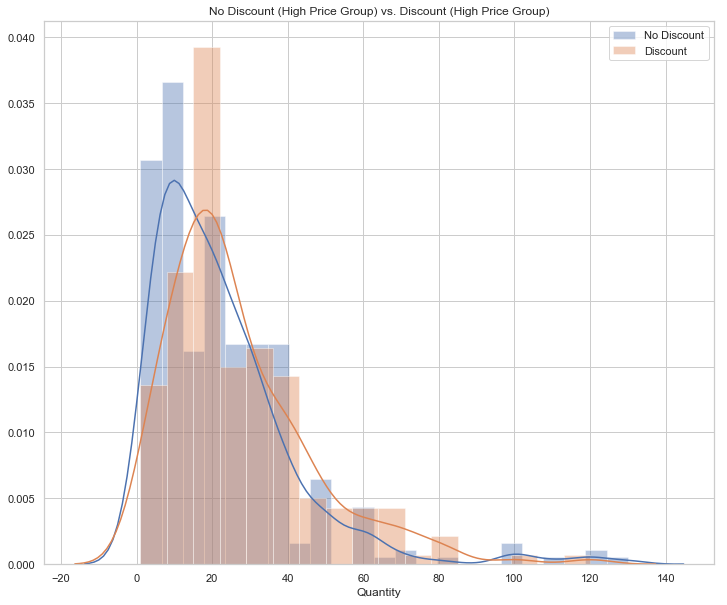

In [83]:
plt.title("No Discount (High Price Group) vs. Discount (High Price Group)")
sns.distplot(no_discount_highprice, label='No Discount') 
sns.distplot(discount_highprice, label='Discount')
plt.legend()
plt.show()

#### Step 1: Write the null and alternative hypothesis statements

$H_{0}$ : There is no relationship between quantity and discount for high price products, i.e. mean number of high price products sold with a discount <= mean number of high price products sold without a discount. 

 mu_discount_highprice <= 22.622

$H_{1}$ : There is a relationship between quanity and discount for high price products, i.e. mean number of high price products sold with a discount <= mean number of high price products sold without a discount. 
 

mu_discount_highprice > 21.694


#### Step 2: Choose a significance level (`α`)

`α` is the probability of rejecting the nully hypothesis when it is true. I will use the standard significance level of `α` = 0.05, meaning that there is a 5% chance risk of concluding that a difference exists when there is no actual difference.

#### Step 3: Calculate the t stat and p value using Welch's t test because the number of observations in each group is not equal.

In [136]:
t = welch_t(no_discount_highprice, discount_highprice)
df = welch_df(no_discount_highprice, discount_highprice)
print("Welch's t stat =",t,"df =",df)

welch_result_highprice = p_value(no_discount_highprice, discount_highprice)
print("Welch's t test p value =",welch_result_highprice)

if  (welch_result_highprice < 0.05):
    print ("Welch's t-test: Null hypothesis rejected. Results are statistically significant with t-value =", 
           round(t, 3), "and p-value =", welch_result_highprice,". I conclude with 95% confidence that there is a relationship between discount and quantity sold for the high price group. Larger quantities are sold when a discount is offered.")
else:
    print ("Null hypothesis is Accepted")

Welch's t stat = 2.4003029056728606 df = 423.0826677505384
Welch's t test p value = 0.00840632587291601
Welch's t-test: Null hypothesis rejected. Results are statistically significant with t-value = 2.4 and p-value = 0.00840632587291601 . I conclude with 95% confidence that there is a relationship between discount and quantity sold for the high price group. Larger quantities are sold when a discount is offered.


In [85]:
Cohen_d(discount_highprice, no_discount_highprice)

0.21443427574918894

#### 3.3) Conclusion - Does discount matter for high priced products?
We see an effect size of 0.214, indicating that discounts applied to products priced greater than $32 has a small effect in terms of increasing quantity sold. 

### Conclusion - What price level is most impacted by discounts?

In [86]:
print("Effect of discount on low price group: d = ", Cohen_d(discount_lowprice, no_discount_lowprice))
print("Effect of discount on mid-low price group: d = ", Cohen_d(discount_midlowprice, no_discount_midlowprice))
print("Effect of discount on mid-high price group: d = ", Cohen_d(discount_midhighprice, no_discount_midhighprice))
print("Effect of discount on high price group: d = ", Cohen_d(discount_highprice, no_discount_highprice))

Effect of discount on low price group: d =  0.1599796998480053
Effect of discount on mid-low price group: d =  0.3680484082392516
Effect of discount on mid-high price group: d =  0.4054373400386941
Effect of discount on high price group: d =  0.21443427574918894


Comparing the Cohen's d for all 4 price groups, I conclude that while discount is statistically significant in increasing the quantity sold for all groups, the effect of discount is most impactful on quanity sold for the mid-high price products, followed by mid-low price, then high price, and has the least effect on low price products.

## Q 4) Within Each Price Group, Does Level of Discount Matter?

### Q 4.1) Analysis of Variance (ANOVA) - Does level of discount matter within the low price group?

In [87]:
df_discount5_lowprice = Order_lowprice[Order_lowprice.Discount > .04]
df_discount5_lowprice.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
2,10252/33,10252,33,2.0,25,0.05
4,10254/24,10254,24,3.6,15,0.15
9,10260/41,10260,41,7.7,16,0.25
10,10260/70,10260,70,12.0,21,0.25
13,10263/74,10263,74,8.0,36,0.25


Is there a difference in quantity sold at different levels of discount for products priced under $12?

$H_{0}$  : There is no relationship between quantity and level of discount, i.e. mean number sold is the same at each level

- mu_discount5 = mu_discount6 = mu_discount10 = mu_discount15 = mu_discount20 = mu_discount25

$H_{1}$ : There is a relationship between quanity and level of discount, i.e. mean number sold differ by level of discount
    
- mu_discount5 != mu_discount6 != mu_discount10 != mu_discount15 != mu_discount20 != mu_discount25

In [138]:
formula = 'Quantity ~ C(Discount)'
lm = ols(formula, df_discount5_lowprice).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                   sum_sq     df         F   PR(>F)
C(Discount)   1861.758980    4.0  1.257724  0.28792
Residual     75123.236213  203.0       NaN      NaN


#### Q4.1) Conclusion:

- PR(>F) > alpha
- 0.28792 > 0.05

With 95% confidence I conclude that there is no significant difference between the quantity of products sold at different discount levels within the low price group. While applying a discount does significantly increase the number of low priced products sold, the level of discount applied doesn't matter.

### Q 4.2) Analysis of Variance (ANOVA) - Does level of discount matter within the mid-low price group?

In [89]:
df_discount5_midlowprice = Order_midlowprice[Order_midlowprice.Discount > .04]
df_discount5_midlowprice.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
1,10250/65,10250,65,16.8,15,0.15
2,10251/22,10251,22,16.8,6,0.05
3,10251/57,10251,57,15.6,15,0.05
11,10258/2,10258,2,15.2,50,0.20
12,10258/5,10258,5,17.0,65,0.20


Is there a difference in quantity sold at different levels of discount for products priced between 12 and 18.4?

$H_{0}$  : There is no relationship between quantity and level of discount, i.e. mean number sold is the same at each level

- mu_discount5 = mu_discount6 = mu_discount10 = mu_discount15 = mu_discount20 = mu_discount25

$H_{1}$ : There is a relationship between quanity and level of discount, i.e. mean number sold differ by level of discount
    
- mu_discount5 != mu_discount6 != mu_discount10 != mu_discount15 != mu_discount20 != mu_discount25

In [90]:
#is there a difference between the levels of discount for mid-low priced products?

formula = 'Quantity ~ C(Discount)'
lm = ols(formula, df_discount5_midlowprice).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                   sum_sq     df         F    PR(>F)
C(Discount)    845.610065    4.0  0.454561  0.769006
Residual     99990.026299  215.0       NaN       NaN


#### Q 4.2) Conclusion:

- PR(>F) > alpha
- 0.769 > 0.05

With 95% confidence I conclude that there is no significant difference between the quantity of products sold at different discount levels for the mid-low price group. While applying a discount does significantly increase the number of mid-low priced products sold, the level of discount applied doesn't matter.

### Q 4.3) Analysis of Variance (ANOVA) - Does level of discount matter within the mid-high price group?

In [91]:
df_discount5_midhighprice = Order_midhighprice[Order_midhighprice.Discount > .04]
df_discount5_midhighprice.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
2,10254/55,10254,55,19.2,21,0.15
4,10258/32,10258,32,25.6,6,0.20
8,10263/30,10263,30,20.7,60,0.25
10,10266/12,10266,12,30.4,12,0.05
12,10269/72,10269,72,27.8,20,0.05


Is there a difference in quantity sold at different levels of discount for products priced between 18.4 and 32?

$H_{0}$  : There is no relationship between quantity and level of discount, i.e. mean number sold is the same at each level

- mu_discount5 = mu_discount6 = mu_discount10 = mu_discount15 = mu_discount20 = mu_discount25

$H_{1}$ : There is a relationship between quanity and level of discount, i.e. mean number sold differ by level of discount
    
- mu_discount5 != mu_discount6 != mu_discount10 != mu_discount15 != mu_discount20 != mu_discount25

In [92]:
#is there a difference between the levels of discount for mid-high priced products?

formula = 'Quantity ~ C(Discount)'
lm = ols(formula, df_discount5_midhighprice).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                   sum_sq     df         F    PR(>F)
C(Discount)   2429.165297    4.0  1.221378  0.302949
Residual     99443.615190  200.0       NaN       NaN


#### Q4.3) Conclusion:

- PR(>F) > alpha
- 0.303 > 0.05

With 95% confidence I conclude that there is no significant difference between the quantity of products sold at different discount levels for the mid-high price group. While applying a discount does significantly increase the number of mid-high priced products sold, the level of discount applied doesn't matter.

### Q 4.4) Analysis of Variance (ANOVA) - Does level of discount matter within the high price group?

In [93]:
df_discount5_highprice = Order_highprice[Order_highprice.Discount > .04]
df_discount5_highprice.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
2,10250/51,10250,51,42.4,35,0.15
3,10252/20,10252,20,64.8,40,0.05
6,10260/62,10260,62,39.4,15,0.25
7,10267/59,10267,59,44.0,70,0.15
11,10275/59,10275,59,44.0,6,0.05


Is there a difference in quantity sold at different levels of discount for products priced over $32?

$H_{0}$  : There is no relationship between quantity and level of discount, i.e. mean number sold is the same at each level

- mu_discount5 = mu_discount6 = mu_discount10 = mu_discount15 = mu_discount20 = mu_discount25

$H_{1}$ : There is a relationship between quanity and level of discount, i.e. mean number sold differ by level of discount
    
- mu_discount5 != mu_discount6 != mu_discount10 != mu_discount15 != mu_discount20 != mu_discount25

In [139]:
formula = 'Quantity ~ C(Discount)'
lm = ols(formula, df_discount5_highprice).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                   sum_sq     df         F    PR(>F)
C(Discount)   1391.378190    5.0  0.725135  0.605343
Residual     73681.394537  192.0       NaN       NaN


#### Q 4.4) Conclusion:

- PR(>F) > alpha
- 0.605 > 0.05

With 95% confidence I conclude that there is no significant difference between the quantity of products sold at different discount levels for the high price group. While applying a discount does significantly increase the number of high priced products sold, the level of discount applied doesn't matter.

### Conclusion - Does level of discount matter within the price groups?

At alpha = 0.05, I am 95% confident that while discount increases the quantity sold for each price group, the level of discount applied doesn't matter in any of the price groups.

## Future Work/Unsused DFs and Variables

In [ ]:
#Joining Product Table w Order Detail Table

In [143]:
cur.execute('''SELECT * 
               FROM Product
               JOIN OrderDetail
               ON Product.ID = OrderDetail.ProductID;''')
ProductandOrders = pd.DataFrame(cur.fetchall())
ProductandOrders.columns = [x[0] for x in cur.description]
            

In [144]:
ProductandOrders.head()

,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,11,Queso Cabrales,5,4,1 kg pkg.,21.00,22,30,30,0,10248/11,10248,11,14.0,12,0.0
1,42,Singaporean Hokkien Fried Mee,20,5,32 - 1 kg pkgs.,14.00,26,0,0,1,10248/42,10248,42,9.8,10,0.0
2,72,Mozzarella di Giovanni,14,4,24 - 200 g pkgs.,34.80,14,0,0,0,10248/72,10248,72,34.8,5,0.0
3,14,Tofu,6,7,40 - 100 g pkgs.,23.25,35,0,0,0,10249/14,10249,14,18.6,9,0.0
4,51,Manjimup Dried Apples,24,7,50 - 300 g pkgs.,53.00,20,0,10,0,10249/51,10249,51,42.4,40,0.0


In [145]:
ProductandOrders.describe()

,Id,SupplierId,CategoryId,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,OrderId,ProductId,UnitPrice,Quantity,Discount
count,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000
mean,40.793039,14.488167,4.135499,27.948687,39.795824,8.074246,11.900232,0.105800,10659.375870,40.793039,26.218520,23.812993,0.056167
std,22.159019,8.228640,2.378567,31.610706,36.055668,19.748983,10.791421,0.307653,241.378032,22.159019,29.827418,19.022047,0.083450
min,1.000000,1.000000,1.000000,2.500000,0.000000,0.000000,0.000000,0.000000,10248.000000,1.000000,2.000000,1.000000,0.000000
25%,22.000000,7.000000,2.000000,12.500000,17.000000,0.000000,0.000000,0.000000,10451.000000,22.000000,12.000000,10.000000,0.000000
50%,41.000000,14.000000,4.000000,19.450000,25.000000,0.000000,10.000000,0.000000,10657.000000,41.000000,18.400000,20.000000,0.000000
75%,60.000000,21.000000,6.000000,34.000000,57.000000,0.000000,20.000000,0.000000,10862.500000,60.000000,32.000000,30.000000,0.100000
max,77.000000,29.000000,8.000000,263.500000,125.000000,100.000000,30.000000,1.000000,11077.000000,77.000000,263.500000,130.000000,0.250000


In [36]:
#Creating Variables for levels of discounts (didn't end up needing for this project)

In [37]:
discount1 = Order[Order.Discount == 0.01]['Quantity']

In [38]:
discount1

2152    2
Name: Quantity, dtype: int64

In [39]:
discount2 = Order[Order.Discount == 0.02]['Quantity']
discount2

2133    1
2146    3
Name: Quantity, dtype: int64

In [40]:
discount3 = Order[Order.Discount == 0.03]['Quantity']
discount3

2139    1
2140    2
2150    2
Name: Quantity, dtype: int64

In [41]:
discount4 = Order[Order.Discount == 0.04]['Quantity']
discount4

2141    1
Name: Quantity, dtype: int64

In [42]:
discount5 = Order[Order.Discount == 0.05]['Quantity']
discount5

8         6
9        15
11       40
12       25
51       12
57       60
58       20
65       24
66       15
68       60
69       33
72       12
73        6
216      10
217       8
218      20
219      12
244      70
246      20
247      12
248      40
256       4
274      20
276      77
277      10
292      10
293      10
294      20
295      56
296      70
       ... 
1691    120
1712     20
1715     20
1716     14
1822     15
1823      6
1824     50
1825     16
1827     50
1828     50
1846      6
1926     18
1937     20
1938     15
1939     21
1963     70
1964     90
1971     40
1973     50
1974     36
1975     60
2057     20
2058     15
2059     18
2115     15
2116     10
2123     14
2134      1
2137      2
2144      2
Name: Quantity, Length: 185, dtype: int64

In [43]:
discount_5orless = Order[Order.Discount <= 0.05]['Quantity']
discount_5orless

0        12
1        10
2         5
3         9
4        40
5        10
8         6
9        15
10       20
11       40
12       25
13       40
14       20
15       42
16       40
19       21
20       20
21       35
22       25
23       30
24       15
25       12
26       25
27        6
28       15
32       10
33        1
35       50
38       20
39       20
       ... 
2116     10
2117      8
2118     40
2119     22
2120    130
2121     10
2122     20
2123     14
2131      4
2132      1
2133      1
2134      1
2136      1
2137      2
2138      4
2139      1
2140      2
2141      1
2142      2
2143      1
2144      2
2145      3
2146      3
2147      2
2148      2
2150      2
2151      1
2152      2
2153      4
2154      2
Name: Quantity, Length: 1509, dtype: int64

In [44]:
discount6 = Order[Order.Discount == 0.06]['Quantity']
discount6

2149    2
Name: Quantity, dtype: int64

In [45]:
discount10 = Order[Order.Discount == 0.1]['Quantity']
discount10

107     10
108      3
115     20
116     24
117      2
147     40
148     30
149     15
153     25
154     25
155     30
177     40
178     30
179     25
227     10
228     40
235     18
263     36
272     15
273     18
303     54
304     55
320      5
321     13
323     35
344      8
345     16
346     20
347     18
348     20
        ..
1547    30
1548    15
1561    70
1562    25
1563    42
1564    60
1628    42
1646    21
1753    20
1754    30
1776    30
1777    14
1779    20
1901    36
1902     8
1903    35
1912    40
1980    28
2007    10
2008    20
2029    70
2030    36
2031    15
2065    50
2094    40
2095    30
2096    77
2098    25
2099     4
2135     2
Name: Quantity, Length: 173, dtype: int64

In [46]:
discount15 = Order[Order.Discount == 0.15]['Quantity']
discount15.head()

6     35
7     15
17    15
18    21
48    25
Name: Quantity, dtype: int64

In [47]:
discount1.mean()

2.0

In [48]:
discount2.mean()

2.0

In [49]:
discount3.mean()

1.6666666666666667

In [50]:
discount5.mean()

28.01081081081081

In [51]:
discount_5orless.mean()

22.39430086149768